#  Assignment 4
*  Anirudh Gupta         18ME10006
*  Rahul Kumar Meena     18EC30033
*  Shreyans Ray          18ME10084

In [2]:
                      #converted the .mat file to a numpy array named data for easy access

import scipy.io
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('2010rainfall.mat')
mat1 = scipy.io.loadmat('2011rainfall.mat')
#print(mat)

arr = np.array((mat['XR1'], mat['ZR1']))
arr1 = np.array((mat1['XR'], mat1['ZR']))

data = np.concatenate((arr[0], arr[1]))
data = np.concatenate((np.zeros((358,2)),data),axis=1)

data1 = np.concatenate((arr1[0], arr1[1]))
data1 = np.concatenate((np.zeros((358,2)),data1),axis=1)

print(np.shape(data))

(358, 124)


In [3]:
## each day act as a data point whereas there are total 358(356+2) features for each data point
## have considered 120 days and excluded 1st 2 days for each location


def xfunc(s,d):
    x=np.array([])
    for t in range(2,124):       
        for i in range(357):
            if (i==s):
                continue
            x=np.append(x,d[i][t])
        x=np.append(x,d[s][t-1])
        x=np.append(x,d[s][t-2])
    x=x.reshape(122,358)
    #x= x.T
    return x
    print(x)

def yfunc(s,d):
    y=np.array([])
    for k in range(2,124):
        y=np.append(y,d[s][k])
    return y


city_test =[41,157,298] ; city_title=['Mumbai','Delhi','Kharagpur']
w_city_test =[[],[],[]];    b_city_test=[[],[],[]];    
for i in range(3):
    X=xfunc(city_test[i],data)
    y=yfunc(city_test[i],data)
    reg = LinearRegression().fit(X,y)
    
    #print(type(reg.coef_))
    w_city_test[i].append(reg.coef_)
    b_city_test[i]=reg.intercept_
    print(b_city_test[i])
#print(w_city_test[i][0])


-4.554758011037968
2.0405354360029513
1.8553284879922725


# Error Using Linear Regression for given 3 cities

In [4]:
city_mse=[]
for j in range(3):
    x_test = xfunc(city_test[j],data1)
    y_true = yfunc(city_test[j],data1)
    sq_err = 0
    w =w_city_test[j]
    for i in range(0, 122):       
        y_pred = np.dot(w[0].T, x_test[i]) + b_city_test[j]
        sq_err += (y_true[i] - y_pred)**2
        
    city_mse.append(sq_err/122)
    print("Mean Squared Error for ",city_title[j],':',city_mse[j])       


Mean Squared Error for  Mumbai : 1333.1478608269015
Mean Squared Error for  Delhi : 480.8601510501071
Mean Squared Error for  Kharagpur : 509.3545305836276


# Lasso Regression Model

In [10]:

a=[38.67,70,57]
for j in range(3):
    x = xfunc(city_test[j],data)
    y = yfunc(city_test[j],data)
    clf = linear_model.Lasso(alpha = a[j])
    clf.fit(x, y)
    w = clf.coef_
    print("Most important features for",city_title[j]," are:  ")
    for i in range(358):
        if w[i] != 0:
            if i<city_test[j]:
                print('s=',i+1)
            if (i>=city_test[j]) & (i<356):
                print('s=',i+2)
            if i==356 :
                print('t-1')
            if i==357 :
                print('t-2')
                
    print("\n")
    

Most important features for Mumbai  are:  
s= 2
s= 6
s= 26
s= 40
s= 41
s= 317


Most important features for Delhi  are:  
s= 26
s= 160
s= 162
s= 216
s= 217


Most important features for Kharagpur  are:  
s= 162
s= 231
s= 233
s= 248
s= 305




#            Decision Tree

In [11]:
                                          ## Preparing data for Decision Tree ##
x_train_df =pd.DataFrame(data[:357,2:]).T
y_train_df =pd.DataFrame(data[357,2:])
x_test_df = pd.DataFrame(data1[:357,2:]).T
y_test_df =pd.DataFrame(data[357,2:])

classifier = DecisionTreeClassifier(criterion = "entropy",max_leaf_nodes=10)
classifier.fit(x_train_df, y_train_df)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

feature: 160  importance: 0.27865916071196073
feature: 124  importance: 0.18085498917357495
feature: 217  importance: 0.1669997669561775
feature: 30  importance: 0.11341020095907922
feature: 265  importance: 0.07018231558067003
feature: 29  importance: 0.06985001395749772
feature: 353  importance: 0.06292302748351512
feature: 84  importance: 0.057120525177524695
feature: 357  importance: 0.0
feature: 356  importance: 0.0


<function matplotlib.pyplot.show(*args, **kw)>

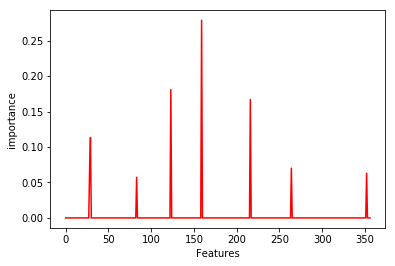

In [12]:
                                      ## Top 10 Important features ##
for importance, name in sorted(zip(classifier.feature_importances_, x_train_df.columns),reverse=True)[:10]:
    print ("feature:",name+1," importance:", importance)

importance= classifier.feature_importances_ 


plt.plot([i for i in range(len(importance))], importance,'r')
plt.xlabel('Features')
plt.ylabel('importance')
plt.show  


In [13]:
                                                 ## Accuracy ##
pred =classifier.predict(x_test_df) 
accuracy_score(y_test_df,pred)*100


61.47540983606557

In [14]:
c=0
t= np.array(y_test_df)
for i in range(122):
    if (t[i] ==pred[i]):
        c+=1
(c/122)*100

61.47540983606557